# ECE/CS 434 | MP1: Visualizing Data
<br />
<nav>
    <span class="alert alert-block alert-warning">Due on Wednesday Feb 24th 2021 on Gradescope</span> |
    <a href="https://www.gradescope.com/courses/223105">Gradescope</a> | 
    <a href="https://courses.grainger.illinois.edu/cs434/sp2021/">Course Website</a> | 
    <a href="http://piazza.com/illinois/spring2021/csece434">Piazza</a>
</nav><br> 

**Name:** <br>
**NetID:**

<hr />  

## Objective
The goal of this MP is for you to become familiar with sensor data collected from mobile phones. We will work with accelerometer data, microphone recordings and Wi-Fi RSSI. All of the data provided to you will be used again in future MPs, so hopefully this will give you a head start. After completing this MP, you should be able to:
- Quickly visualize readings from various mobile phone sensors.
- Interpret various aspects of sensor data from plots.

---
## Imports & Setup
The following `code` cell, when run, imports the libraries that you will require for the coding part of this MP. The use of other standard libraries is allowed but uneeded.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Accelerometer
Three sets of accelerometer data are provided to you in `accl/*.csv` files. For each file, there are three columns, representing the accelerometer readings in three local axes x, y and z (in that order) (unit: $m / s^{2}$). The [orientations](https://www.mathworks.com/help/supportpkg/android/ref/simulinkandroidsupportpackage_galaxys4_accelerometer.png) are consistent with what was covered in lecture. The accelerometer is sampled at $100\text{ Hz}$. 

#### Exercise 1
For each set of data (CSV file), plot the accelerometer readings over time. Clearly label the x and y axes of the plot, and create a legend indicating what local axes (x, y, or z) each line in your plot corresponds to. For each set of readings, you may instead use different subplots for different accelerometer axes,  if you find that more readable.

Please enter your solution in the `code` cell below:

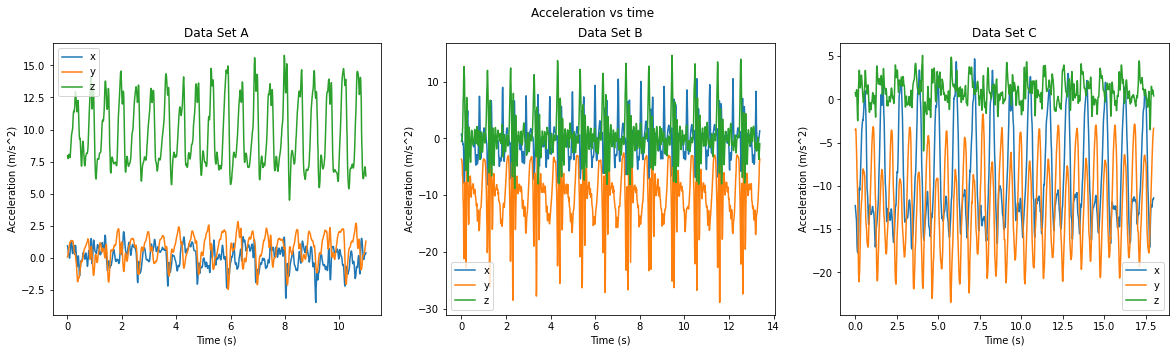

In [106]:
# Exercise 1 code here:
csvfile_a = pd.read_csv(r"accl\a.csv", header=None)
csvfile_b = pd.read_csv(r"accl\b.csv", header=None)
csvfile_c = pd.read_csv(r"accl\c.csv", header=None)
# print(csvfile_a.info)     # debugging

###

a_x = np.array(csvfile_a[0])
a_y = np.array(csvfile_a[1])
a_z = np.array(csvfile_a[2])

b_x = np.array(csvfile_b[0])
b_y = np.array(csvfile_b[1])
b_z = np.array(csvfile_b[2])

c_x = np.array(csvfile_c[0])
c_y = np.array(csvfile_c[1])
c_z = np.array(csvfile_c[2])


###

time1 = np.linspace(0, a_x.shape[0]/100, a_x.shape[0])
time2 = np.linspace(0, b_x.shape[0]/100, b_x.shape[0])
time3 = np.linspace(0, c_x.shape[0]/100, c_x.shape[0])


###

fig, ax = plt.subplots(1,3, figsize=(20,5))
fig.suptitle("Acceleration vs time")
ax[0].set(xlabel="Time (s)", ylabel="Acceleration (m/s^2)")
ax[1].set(xlabel="Time (s)", ylabel="Acceleration (m/s^2)")
ax[2].set(xlabel="Time (s)", ylabel="Acceleration (m/s^2)")

ax[0].set_title("Data Set A")
ax[1].set_title("Data Set B")
ax[2].set_title("Data Set C")

line1, = ax[0].plot(time1,a_x)
line2, = ax[0].plot(time1,a_y)
line3, = ax[0].plot(time1,a_z)
ax[0].legend([line1, line2, line3], ("x","y","z"))


line1, = ax[1].plot(time2,b_x)
line2, = ax[1].plot(time2,b_y)
line3, = ax[1].plot(time2,b_z)
ax[1].legend([line1, line2, line3], ("x","y","z"))

line1, = ax[2].plot(time3,c_x)
line2, = ax[2].plot(time3,c_y)
line3, = ax[2].plot(time3,c_z)
ax[2].legend([line1, line2, line3], ("x","y","z"))




#### Exercise 2:
The accelerometer readings were collected under three circumstances: 
<ol type="A">
  <li>walking with phone in pant pocket</li>
  <li>walking with phone held in the hand statically as if the user is looking at it while walking</li>
  <li>walking with phone in hand and the hand swinging</li>
</ol>

Carefully observe the graphs from Exercise 1 and identify which scenario each corresponds to. 

<div class="alert alert-block alert-info"><b>Hint:</b> When phone is held statically in the hand, the local y axis is relatively aligned with the walking direction. Acceleration in which direction is relatively small? When phone is in hand and the hand is swinging, the local z axis is perpendicular to your palm. Acceleration in which direction is relatively small? </div>

Please enter your answer in the `markdown` cell below: 

**Exercise 2 Answer**:
* Data `a.csv` is for: __walking with phone held in the hand statically as if the user is looking at it while walking___
* Data `b.csv` is for: __walking with phone in pant pocket__
* Data `c.csv` is for: __walking with phone in hand and the hand swinging__

#### Exercise 3

For the data `accl/a.csv`, what is the final velocity of the phone in the y direction? Assume that the initial velocity is $0$.

<div class="alert alert-block alert-info"><b>Hint:</b> You will need to perform integration. </div>

Please enter your solution in the `code` cell below.

In [107]:
# Exercise 3 code here:
final_velocity_a = np.trapz(a_y,time1)
print("The final velocity of the phone in the y direction is: ", final_velocity_a )

The final velocity of the phone in the y direction is:  7.899185413525814


#### Exercise 4

Typical walking speed is $1.5\frac{m}{s}$. What causes the discrepancy between this expected speed and your result in Exercise 3?

Please enter your answer in the `markdown` cell below: 

**Exercise 4 Answer**: __Firstly, we must consider that there is an inherent margin of error in the phone's hardware sensors and their implementations. Especially when measuring at 50 Hz. Nevertheless, we must consider the more siginficant sources of this discrepency such as the fact that the user may have not kept the telephone perfectly straight. Consider the situaiton where the user turns their hand 90 degrees at the top of every small or large "swing" they make with their hand. Then some positive y acceleration may be not cancelled by the corresponding negative y acceleration from the action being performed in the opposite direction. It is the opposite direction, it just read perhaps as (partially) negative or positive x (or z) acceleration. And of course the effect of these sources of errors is only exacerbated by taking a trapezoidal integral across many samples, causing the absolute size of the error to increase as the sameples are summed.__

---
## Microphone
You are given two microphone recordings from two different microphones on the same device. In `microphone/1.csv`, the first column corresponds to samples collected by the first microphone and the second column corresponds to the second microphone. The sampling rate of the microphones are $16\text{ kHz}$. 

#### Exercise 5
Plot the microphone recordings over time. Clearly label the x and y axes, and create a legend to indicate which microphone each line corresponds to. Note that it is okay if the lines look like they overlap.

Please enter your solution in the `code` cell below.

<function matplotlib.pyplot.show(close=None, block=None)>

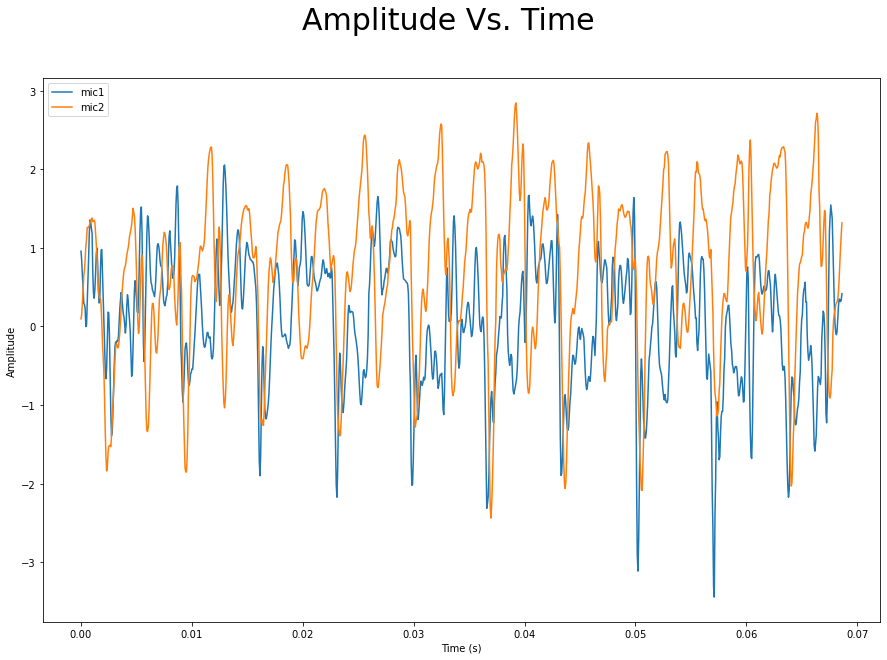

In [108]:
# Exercise 5 code here:
# Exercise 1 code here:
csvfile_1 = pd.read_csv(r"microphone\1.csv", header=None)

# print(csvfile_a.info)     # debugging

###

mic_1 = np.array(csvfile_a[0])
mic_2 = np.array(csvfile_a[1])


###



time1 = np.linspace(0, mic_1.shape[0]/16000, mic_1.shape[0])

###
plt.figure(figsize=(15,10))
line1, = plt.plot(time1, mic_1, label="mic1")
line2, = plt.plot(time1, mic_2, label="mic2")
#plt.set(xlabel=" time (s)", ylabel="Decibels ?")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.suptitle("Amplitude Vs. Time", fontsize="30")

#ax = plt.gca()
#handles, labels = ax.get_legend_handles_lables()
plt.legend([line1,line2], ("mic1", "mic2"))
plt.show
           




#### Exercise 6
Zoom in to your plot from Exercise 5. How many samples does mic 1 lag behind mic 2 by? You only need to provide a rough estimate.

You may use the optional `code` cell below if you need to plot again. Please enter your answer in the `markdown` cell below: 

<function matplotlib.pyplot.show(close=None, block=None)>

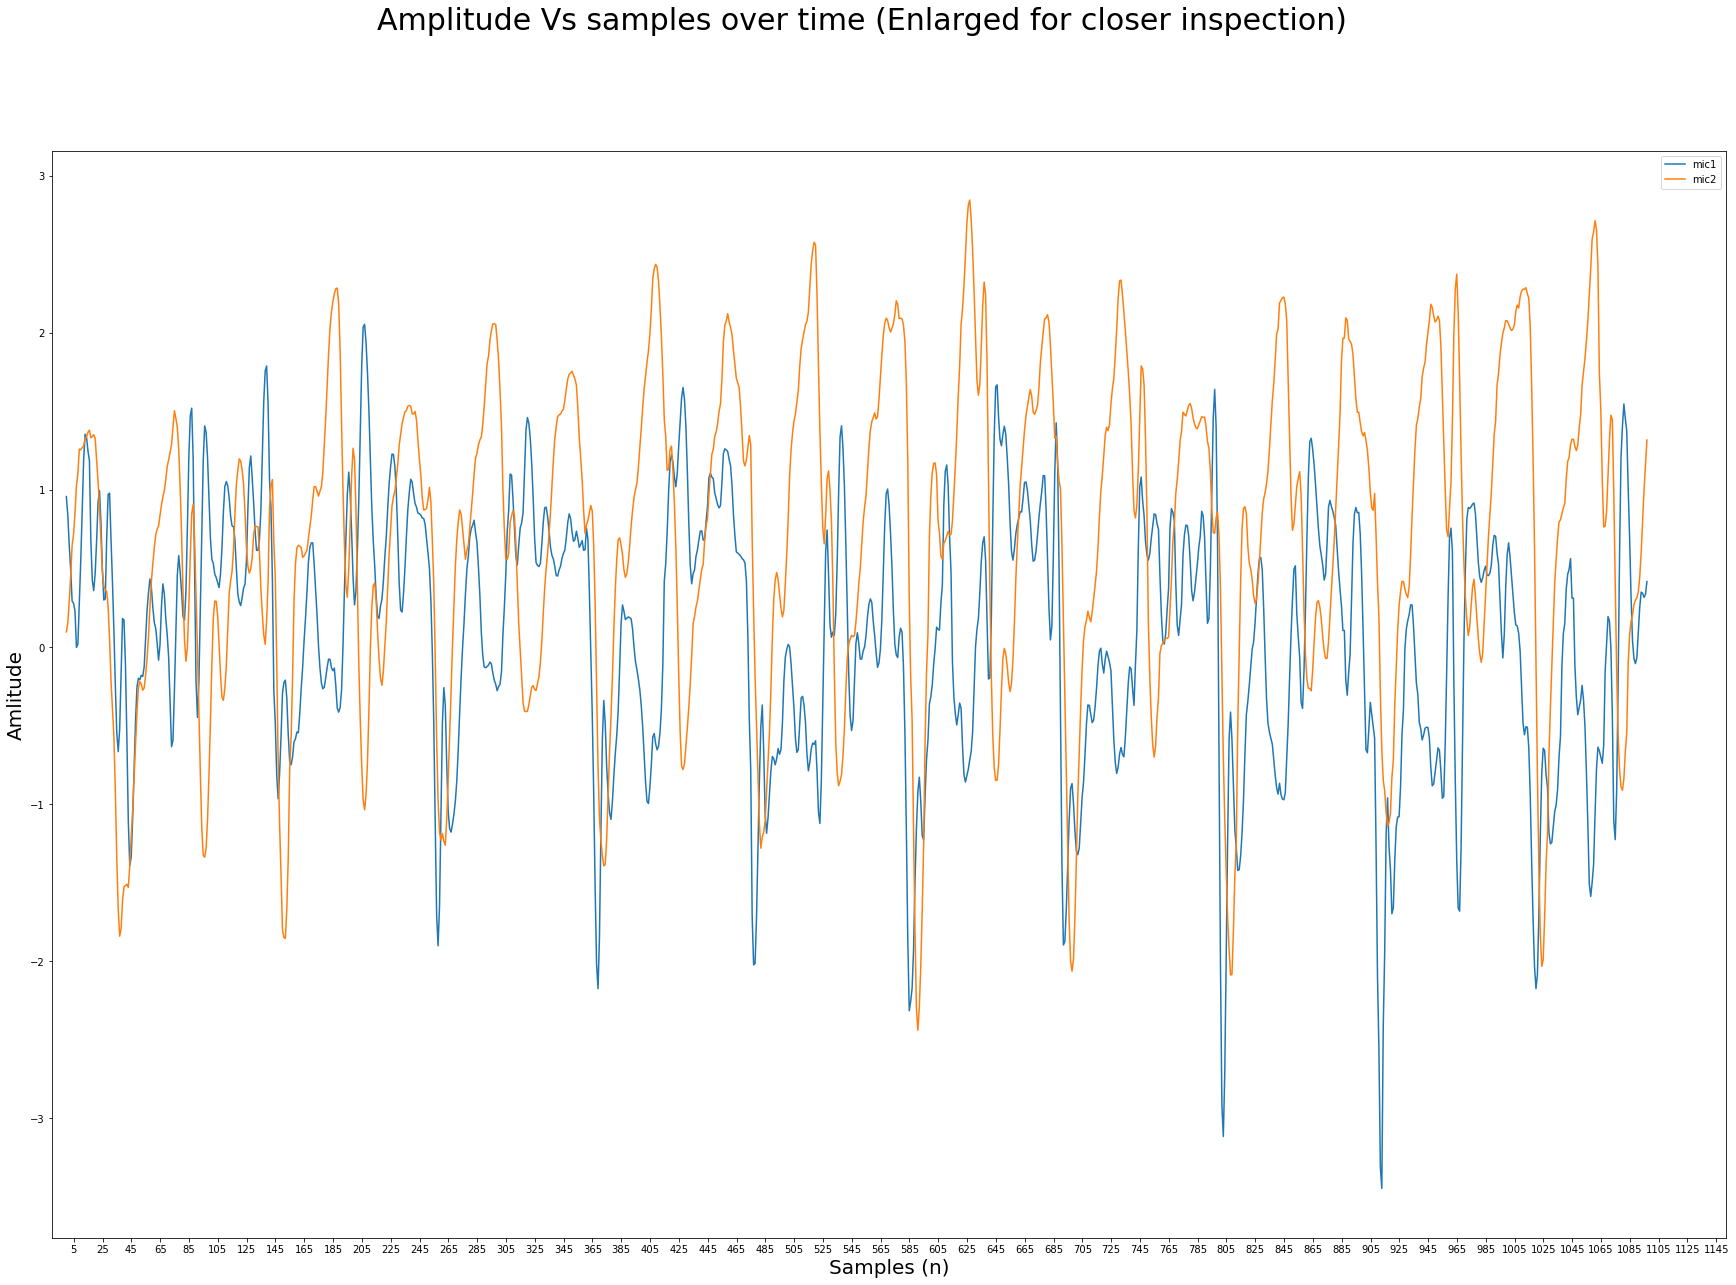

In [109]:
# (Optional) Exercise 6 code here:

# Exercise 5 code here:
# Exercise 1 code here:
csvfile_1 = pd.read_csv(r"microphone\1.csv", header=None)

# print(csvfile_a.info)     # debugging

###

mic_1 = np.array(csvfile_a[0])
mic_2 = np.array(csvfile_a[1])


###



time1 = np.linspace(0, mic_1.shape[0]/16000, mic_1.shape[0])

###
plt.figure(figsize=(30,20))
line1, = plt.plot(mic_1)
line2, = plt.plot(mic_2)
ax = plt.gca()

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 20))

plt.xlabel("Samples (n)", fontsize = 20)
plt.ylabel("Amlitude", fontsize=20)
plt.suptitle("Amplitude Vs samples over time (Enlarged for closer inspection)", fontsize="30")
plt.xlim(left=-10)                          # -10 to give some "breather space" so 0 isn't right on
plt.legend([line1,line2], ("mic1", "mic2")) # the axis. But, short enough so matplotlib doesnt add a 
plt.show                                    # negative label.



**Exercise 6 Answer**: Mic 1 lags behind Mic 2 by ~8 samples.

---
## Wi-Fi
Wi-Fi RSSI (Received Signal Strength Indicator) is a measurement of how well your device can receive signals from a given access point or router. A user walks around a room that has 3 Wi-Fi access points. You are given the RSSI reading from their smartphone in this format: $(\text{SSID}, \text{HH:MM:SS}, \text{RSSI})$. SSID (Service Set Identifier) is a unique identifier that distinguishes between access points.

#### Exercise 7
For every unique access point, plot the RSSI over time. Clearly label the x and y axes, and create a legend to indicate which access point each line corresponds to. You may create separate graphs if you think that is more readable.

Please enter your solution in the `code` cell below.

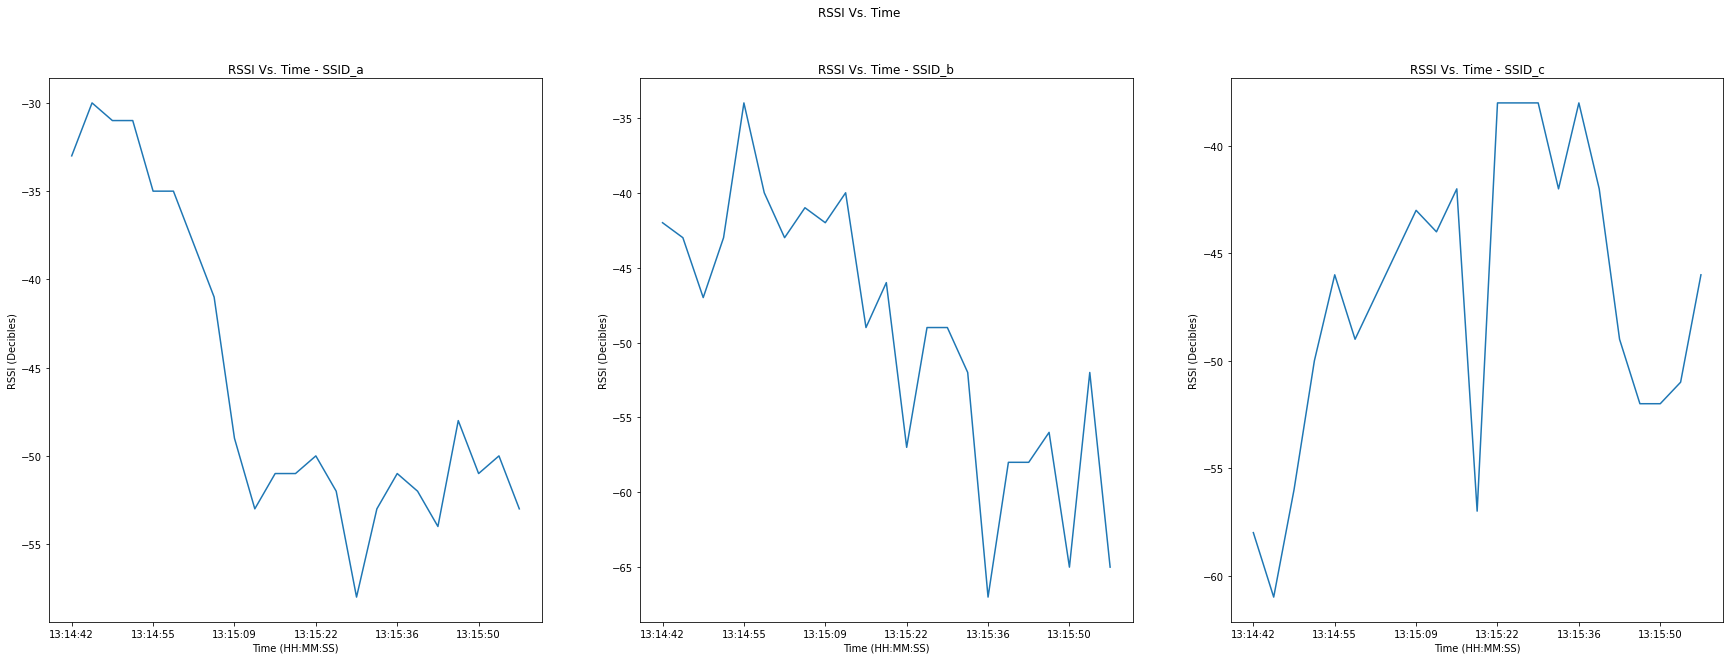

In [110]:
# Exercise 7 code here:

csvfile_a = pd.read_csv(r"wifi\1-walk-1.csv")
array_SSIDs = np.array(csvfile_a["SSID"])
array_times = np.array(csvfile_a["Time"])
array_RSSIs = np.array(csvfile_a["RSSI"])

list_time_a = []
list_RSSI_a = []
list_time_b = []
list_RSSI_b = []
list_time_c = []
list_RSSI_c = []
list_sorted_a = [list_time_a, list_RSSI_a]
list_sorted_b = [list_time_b, list_RSSI_b]
list_sorted_c = [list_time_c, list_RSSI_c]
dict_sorted = {"a": list_sorted_a, "b" : list_sorted_b, "c" : list_sorted_c}

for i in range(len(array_SSIDs)):
    # if(array_SSIDs[i] == "a"):
    dict_sorted[array_SSIDs[i]][0].append(array_times[i])  # time
    dict_sorted[array_SSIDs[i]][1].append(array_RSSIs[i])  # RSSI
    
    
    
# time for graphing

# Tried to get into one graph -

# plt.figure(figsize=(15,10))
# line1, = plt.plot(np.array(dict_sorted["a"][0]), np.array(dict_sorted["a"][1]), label="SSID_a")
# line2, = plt.plot(np.array(dict_sorted["b"][0]), np.array(dict_sorted["b"][1]), label="SSID_b")
# line3, = plt.plot(np.array(dict_sorted["c"][0]), np.array(dict_sorted["c"][1]), label="SSID_c")

# plt.xlabel("time (s)")
# plt.ylabel("RSSI strength?")
# plt.suptitle("RSSI strength? vs time", fontsize="30")

                                     ##ax = plt.gca()
                                     ##handles, labels = ax.get_legend_handles_lables()
# plt.legend([line1,line2,line3], ("SSID_a", "SSID_b","SSID_c"))

# locs, labels = plt.xticks()
# plt.xticks(locs,labels, rotation= 90)
# plt.show


# 3 separate graphs- 

fig, ax = plt.subplots(1,3, figsize=(30,10))
fig.suptitle("RSSI Vs. Time")
ax[0].set(xlabel="Time (HH:MM:SS)", ylabel="RSSI (Decibles)")
ax[1].set(xlabel="Time (HH:MM:SS)", ylabel="RSSI (Decibles)")
ax[2].set(xlabel="Time (HH:MM:SS)", ylabel="RSSI (Decibles)")

ax[0].set_title("RSSI Vs. Time - SSID_a")
ax[1].set_title("RSSI Vs. Time - SSID_b")
ax[2].set_title("RSSI Vs. Time - SSID_c")

line1, = ax[0].plot(np.array(dict_sorted["a"][0]), np.array(dict_sorted["a"][1]), label="SSID_a")
line1, = ax[1].plot(np.array(dict_sorted["b"][0]), np.array(dict_sorted["b"][1]), label="SSID_b")
line1, = ax[2].plot(np.array(dict_sorted["c"][0]), np.array(dict_sorted["c"][1]), label="SSID_c")


xticks = ax[0].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
        
xticks = ax[1].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)

xticks = ax[2].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
        
#ax1= plt.subplot(1,1,1)
#ax1.set_xticks(range(0, len(np.array(dict_sorted["a"][0])), 4), np.array(dict_sorted["a"][0])[::4])


#### Exercise 8
File `wifi/room.png` shows a layout of the room. The locations of the three Wi-Fi access points are annotated on the figure. Think of a possible **straight-line path** of how the user walked in the room. What are the starting and ending coordinates of this straight-line path? Reading your graph from Exercise 7 and eyeballing to give a rough estimate would suffice.

Please enter your answer in the `markdown` cell below:

**Exercise 8 Answer**:
* Starting coordinates are: ~ ( 1_ , 2_ )
* Ending coordinates are: ~ ( 4_ , 2_ )

---
## Submission
This Jupyter notebook is the only thing you need to submit to Gradescope. Please make sure that:
* All graphs and results are outputted and readable.
* All short-answer markdown cells are filled in.

---
## Rubric
| Exercise | Rubric                                                    | Points       |
|---------:|:----------------------------------------------------------|-------------:|
| 1        | All 3 accelerometer plots are correct and clearly labeled | $3 \times 2$ |
| 2        | Answer is correct                                         | $3$          |
| 3        | Answer is correct                                         | $1$          |
| 4        | Answer is correct                                         | $1$          |
| 5        | Microphone plot is correct and clearly labeled            | $6$          |
| 6        | Answer is correct                                         | $4$          |
| 7        | Wi-Fi plot is correct and clearly labeled                 | $6$          |
| 8        | Answer is correct                                         | $4$          |